# **Predicting Heart Disease using Neural Networks**

This project focuses on predicting heart disease using neural networks based on features such as blood pressure, cholestoral levels, heart rate, and other characteristic features, patients will be classified according to varying degrees of coronary artery disease. This project utilizes a dataset of 303 patients and is available through the University of California, Irvine Machine learning repository. Here is the URL:

http:////archive.ics.uci.edu/ml/datasets/Heart+Disease

This dataset contains patient data concerning heart disease diagnosis that was collected at several locations around the world. There are 76 attributes, including age, sex, resting blood pressure, cholestoral levels, echocardiogram data, exercise habits, and many others. To date, all published studies using this data focus on a subset of 14 attributes - so we will do the same. More specifically, we will use the data collected at the Cleveland Clinic Foundation.

We have used some common Python libraries, such as pandas, numpy, and matplotlib. Further we have also used sklearn and keras.

In [42]:
import sys
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import lux
import keras

### 1. Importing the Dataset

In [28]:
# importing the dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# renaming the columns in our pandas DataFrame
names = ['age',
        'sex',
        'cp',
        'trestbps',
        'chol',
        'fbs',
        'restecg',
        'thalach',
        'exang',
        'oldpeak',
        'slope',
        'ca',
        'thal',
        'class']

# reading the data
cleveland = pd.read_csv(url, names=names)

### 2. Exploratory Data Analysis & Feature Engineering

In [25]:
# exploring the dataset
cleveland.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  class     303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


Looks like there are no missing values in the dataset. Let us check some of the values in the dataset.

In [32]:
cleveland.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


Looks good. However, we will need to convert the "class" column values to categorical data when we split the datasets.

For now, let us also check the values at the bottom of the dataset.

In [33]:
cleveland.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
293,63.0,1.0,4.0,140.0,187.0,0.0,2.0,144.0,1.0,4.0,1.0,2.0,7.0,2
294,63.0,0.0,4.0,124.0,197.0,0.0,0.0,136.0,1.0,0.0,2.0,0.0,3.0,1
295,41.0,1.0,2.0,120.0,157.0,0.0,0.0,182.0,0.0,0.0,1.0,0.0,3.0,0
296,59.0,1.0,4.0,164.0,176.0,1.0,2.0,90.0,0.0,1.0,2.0,2.0,6.0,3
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


We see that there is a "?" value in one of the columns.

Let us remove these values from the dataset.

In [34]:
data = cleveland[~cleveland.isin(['?'])]
data.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
293,63.0,1.0,4.0,140.0,187.0,0.0,2.0,144.0,1.0,4.0,1.0,2.0,7.0,2
294,63.0,0.0,4.0,124.0,197.0,0.0,0.0,136.0,1.0,0.0,2.0,0.0,3.0,1
295,41.0,1.0,2.0,120.0,157.0,0.0,0.0,182.0,0.0,0.0,1.0,0.0,3.0,0
296,59.0,1.0,4.0,164.0,176.0,1.0,2.0,90.0,0.0,1.0,2.0,2.0,6.0,3
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


Now that we have removed the "?" values from the dataset, let us now drop the rows with these missing NaN values.

In [37]:
data = data.dropna(axis=0)
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  class     297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


We see that the no. of rows have dropped from 303 to 297 now, meaning 6 rows have been dropped.

Now, let us check the datatypes of the features in the dataframe.

In [38]:
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object

We see that the features "ca" and "thal" are object types. Let us convert them to a numeric data format for easier analysis.

In [39]:
data = data.apply(pd.to_numeric)
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object

Nice! Now let us see some statistics about the dataset using the describe function in pandas.

In [40]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Okay. Now let us also check the distribution of the features.





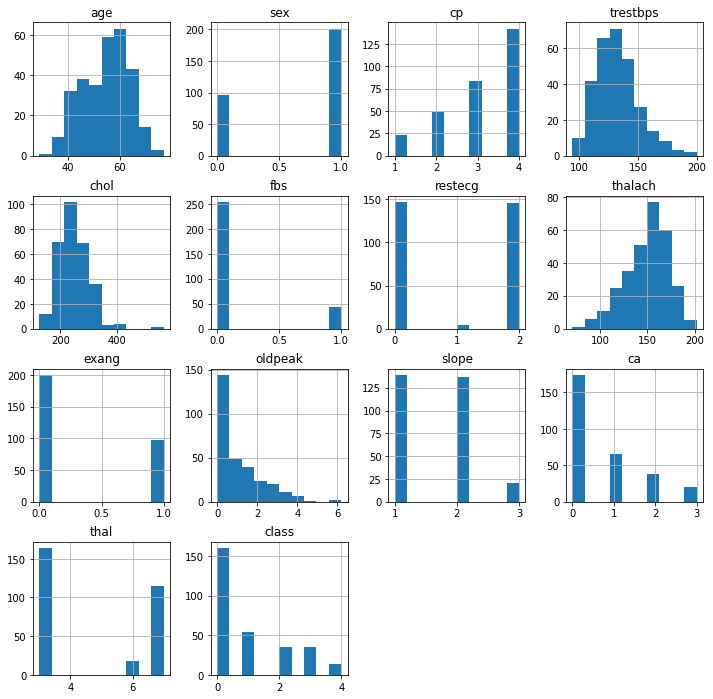

In [41]:
data.hist(figsize = (12, 12))
plt.show()

Finally, let us check the correlation between the features using a correlation heatmap from seaborn.

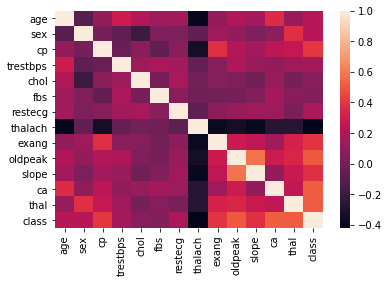

In [43]:
sns.heatmap(data.corr())

The features are mostly loosely correlated. Some of them however have moderate positive correlation and also moderate negative correlation.

Now that we are satisfied with our dataset, let us get started with splitting the data.

### 3. Splitting the Data

For splitting the data into training and test datasets, we will use Sklearn's train_test_split() function to generate a training dataset (80 percent of the total data) and test dataset (20 percent of the total data).

Further, as mentioned before, the class values in this dataset contain multiple types of heart disease with values ranging from 0 (healthy) to 4 (severe heart disease). 

Consequently, we will need to convert our class data to categorical labels.

In [44]:
from sklearn import model_selection

X = np.array(data.drop(['class'], 1))
y = np.array(data['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [48]:
# Now let's convert the "class" data to categorical labels
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
Y_train.shape
Y_train[:10]

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

### 4. Building and Training the Neural Network

Now that we have our data fully processed and split into training and test datasets, we can begin building a neural network to solve this classification problem. 

Using keras, we will define a simple neural network with one hidden layer. Since this is a categorical classification problem, we will use a softmax activation function in the final layer of our network and a categorical_crossentropy loss during our training phase.

In [49]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# defining a function to build the keras model
def create_model():
    # creating model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    # compiling model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 112       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 25        
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________
None


In [50]:
# fitting the model to the training data
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 1.6188 - accuracy: 0.2232
Epoch 2/100
24/24 [==============================] - 0s 956us/step - loss: 1.4391 - accuracy: 0.5205
Epoch 3/100
24/24 [==============================] - 0s 988us/step - loss: 1.3734 - accuracy: 0.5126
Epoch 4/100
24/24 [==============================] - 0s 985us/step - loss: 1.2863 - accuracy: 0.5400
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1846 - accuracy: 0.5677
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 1.2488 - accuracy: 0.5241
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1938 - accuracy: 0.5488
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 1.2474 - accuracy: 0.4853
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1501 - accuracy: 0.5486
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1944 - accuracy: 0.5029
Epo

### 5. Improving Results - A Binary Classification Problem

Although we achieved decent results, we still have a fairly large error. This could be because it is difficult to distinguish between the different severity levels of heart disease (classes 1 - 4). 

Let us simplify the problem by converting the data to a binary classification problem - whether the patient has a heart disease or no heart disease.

In [57]:
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

Y_train_binary[:20]

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1])

So now, we have the class values classified into binary values.

0 = no heart disease
1 = heart disease (but class undefined)

In [58]:
# defining a new keras model for binary classification
def create_binary_model():
    # creating model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compiling model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
None


In [60]:
# fitting the new binary model on the training data
binary_model.fit(X_train, Y_train_binary, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.5897 - accuracy: 0.4556
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7264 - accuracy: 0.5420
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7232 - accuracy: 0.4476
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6899 - accuracy: 0.5030
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6826 - accuracy: 0.5684
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6811 - accuracy: 0.5337
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6739 - accuracy: 0.5439
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6496 - accuracy: 0.6334
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6328 - accuracy: 0.6838
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6289 - accuracy: 0.6672
Epoch 11/

### 6. Final Results and Metrics Evaluation

The accuracy results we see are for the training data. Now, let us test the performance of both our categorical model and binary model on the test data. 

To do this, we will make predictions on the test data and calculate performance metrics using Sklearn.

In [63]:
# generating classification report - Categorical Model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model - ')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

Results for Categorical Model - 
0.6333333333333333
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        34
           1       0.29      0.22      0.25         9
           2       0.00      0.00      0.00         8
           3       0.36      0.62      0.45         8
           4       0.00      0.00      0.00         1

    accuracy                           0.63        60
   macro avg       0.29      0.35      0.31        60
weighted avg       0.55      0.63      0.59        60



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
# generating classification report - Binary Model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model - ')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

Results for Binary Model - 
0.8166666666666667
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        34
           1       0.76      0.85      0.80        26

    accuracy                           0.82        60
   macro avg       0.81      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



We observe that our binary model gives better predictions with an average precision, recall, and f1-score of 0.82 respectively as compared to the categorical model.